In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

PERCENTILE:
   1. given value y is x percentile implies there are x% are below that given point
   2. percentile of max value =100%
   3. percentile of min value is 0%   

In [2]:
df=pd.read_csv('../resources/Excel_sheets/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [5]:
df2=df.dropna(subset=['size','location'])

In [6]:
df3=df2.copy()

In [7]:
df3['bhk']=df2['size'].apply(lambda x: int(x.split(" ")[0]))

In [8]:
df3.bath.fillna(int(df3.bath.mean()),inplace=True)
df3.balcony.fillna(0,inplace=True)
df3.society.fillna('unknown',inplace=True)
df3.drop('size',axis=1,inplace=True)
df3.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,unknown,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,unknown,1200,2.0,1.0,51.00,2


In [9]:
df3.isnull().sum()

area_type       0
availability    0
location        0
society         0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [10]:
df3.groupby('area_type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
area_type,,,,,,,,
Built-up Area,2418.0,104.285498,109.270222,9.0,47.0000,70.0,120.0,2050.0
Carpet Area,87.0,89.502356,73.446012,13.0,47.7025,70.0,100.0,500.0
Plot Area,2009.0,209.368148,253.849250,10.5,85.0000,140.0,240.0,3600.0
Super built-up Area,8789.0,92.972550,113.977674,8.0,47.2500,65.0,98.2,2912.0


In [11]:
df3.location.nunique()

1304

In [12]:
df4=df3.copy()

In [13]:
location_stats=df3.location.value_counts()
z=location_stats[location_stats<10].index
df4.location=df4.location.apply(lambda x: 'other' if x in z  else x)

In [14]:
df4.location.nunique()

254

In [15]:
df4.head(101)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,unknown,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,unknown,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
96,Plot Area,Ready To Move,Kengeri,Goardth,2894,4.0,1.0,245.00,4
97,Super built-up Area,Ready To Move,Sarjapura - Attibele Road,unknown,1330,2.0,1.0,48.00,3
98,Built-up Area,Ready To Move,other,unknown,1200,2.0,1.0,65.00,2
99,Built-up Area,Ready To Move,other,unknown,1200,3.0,1.0,90.00,3


In [16]:
df4.society.nunique()

2677

In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13303 non-null  object 
 1   availability  13303 non-null  object 
 2   location      13303 non-null  object 
 3   society       13303 non-null  object 
 4   total_sqft    13303 non-null  object 
 5   bath          13303 non-null  float64
 6   balcony       13303 non-null  float64
 7   price         13303 non-null  float64
 8   bhk           13303 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 1.0+ MB


In [18]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
df5=df4.copy()

In [20]:
errors=[]
def con_float(x):
    try:
        float(x)
    except ValueError:
        errors.append(x)
df5.total_sqft.apply(con_float)
errors

['2100 - 2850',
 '3010 - 3410',
 '2957 - 3450',
 '3067 - 8156',
 '1042 - 1105',
 '1145 - 1340',
 '1015 - 1540',
 '1520 - 1740',
 '34.46Sq. Meter',
 '1195 - 1440',
 '4125Perch',
 '1120 - 1145',
 '4400 - 6640',
 '3090 - 5002',
 '4400 - 6800',
 '1160 - 1195',
 '1000Sq. Meter',
 '4000 - 5249',
 '1115 - 1130',
 '1100Sq. Yards',
 '520 - 645',
 '1000 - 1285',
 '3606 - 5091',
 '650 - 665',
 '633 - 666',
 '5.31Acres',
 '30Acres',
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '1440 - 1884',
 '716Sq. Meter',
 '547.34 - 827.31',
 '580 - 650',
 '3425 - 3435',
 '1804 - 2273',
 '3630 - 3800',
 '660 - 670',
 '4000 - 5249',
 '1500Sq. Meter',
 '620 - 933',
 '142.61Sq. Meter',
 '2695 - 2940',
 '1574Sq. Yards',
 '3450 - 3472',
 '1250 - 1305',
 '670 - 980',
 '1005.03 - 1252.49',
 '3630 - 3800',
 '1004 - 1204',
 '361.33Sq. Yards',
 '645 - 936',
 '2710 - 3360',
 '2249.81 - 4112.19',
 '3436 - 3643',
 '2830 - 2882',
 '596 - 804',
 '1255 - 1863',
 '1300 - 1405',
 '117Sq. Yards',
 '934 - 1437',
 '980 - 1030',
 

In [21]:
def con_float(x):
    try:
        z=x.split("-")
        if len(z)==2:
            return (float(z[0])+float(z[1]))/2
        else:
            if x.endswith("Sq. Meter"):
                return float(x.split("Sq. Meter")[0])*10.764
            elif x.endswith("Sq. Yards"):
                return float(x.split("Sq. Yards")[0])*9
            elif x.endswith("Acres"):
                return float(x.split("Acres")[0])*43560
            elif x.endswith("Cents"):
                return float(x.split("Cents")[0])*435.56
            elif x.endswith("Perch"):
                return float(x.split("Perch")[0])*272.25
            elif x.endswith("Guntha"):
                return float(x.split("Guntha")[0])*1089
            elif x.endswith("Grounds"):
                return float(x.split("Grounds")[0])*2400           
    except AttributeError:
        return float(x)
    return float(x)

In [22]:
df5.total_sqft=df5.total_sqft.apply(con_float)

In [23]:
df5=df5.astype({'total_sqft':np.float32,'bath':np.uint8,'balcony': np.uint8,'bhk':np.uint8})

In [24]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13303 non-null  object 
 1   availability  13303 non-null  object 
 2   location      13303 non-null  object 
 3   society       13303 non-null  object 
 4   total_sqft    13303 non-null  float32
 5   bath          13303 non-null  uint8  
 6   balcony       13303 non-null  uint8  
 7   price         13303 non-null  float64
 8   bhk           13303 non-null  uint8  
dtypes: float32(1), float64(1), object(4), uint8(3)
memory usage: 714.5+ KB


In [25]:
df6=df5.copy()

In [26]:
df6['price_per_sqft']=round((df5.price/df5.total_sqft)*100000,2)
df6.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2,1,39.07,2,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5,3,120.00,4,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,unknown,1440.0,2,3,62.00,3,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3,1,95.00,3,6245.89
4,Super built-up Area,Ready To Move,Kothanur,unknown,1200.0,2,1,51.00,2,4250.00


## Outlier Detection

In [27]:
df6.price_per_sqft.describe()

count    1.330300e+04
mean     7.907398e+03
std      1.063169e+05
min      2.260000e+00
25%      4.263485e+03
50%      5.433830e+03
75%      7.313545e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

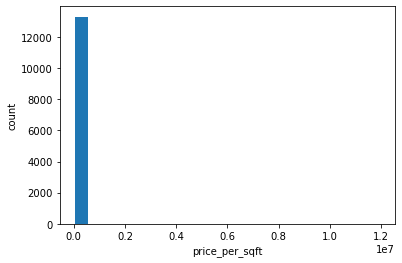

In [28]:
plt.hist(df6.price_per_sqft,bins=20,rwidth=0.8)
plt.ylabel('count')
plt.xlabel('price_per_sqft')
plt.show()

In [29]:
max_tresh=df6.price_per_sqft.quantile(0.95)
max_tresh

15284.939999999991

### using quantile

In [30]:
max_tresh,min_tresh=df6.price_per_sqft.quantile([0.95,0.01])
max_tresh,min_tresh

(15284.939999999991, 2500.0)

In [31]:
df6[df6.price_per_sqft>max_tresh].head(10)

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft
7,Super built-up Area,Ready To Move,Rajaji Nagar,Brway G,3300.0,4,0,600.0,4,18181.82
9,Plot Area,Ready To Move,other,unknown,1020.0,6,0,370.0,6,36274.51
45,Plot Area,Ready To Move,HSR Layout,unknown,600.0,9,0,200.0,8,33333.33
48,Plot Area,Ready To Move,KR Puram,unknown,800.0,1,1,130.0,2,16250.00
70,Plot Area,Ready To Move,other,unknown,500.0,3,2,100.0,3,20000.00
89,Plot Area,Ready To Move,Rajaji Nagar,unknown,710.0,6,3,160.0,6,22535.21
133,Plot Area,Ready To Move,other,unknown,1200.0,4,0,210.0,4,17500.00
149,Plot Area,Ready To Move,other,unknown,1034.0,5,0,185.0,6,17891.68
159,Plot Area,Ready To Move,Mahalakshmi Layout,unknown,3750.0,4,0,760.0,4,20266.67
185,Plot Area,Ready To Move,other,unknown,1846.0,3,2,300.0,3,16251.35


In [32]:
df7=df6[(df6.price_per_sqft<max_tresh) & (df6.price_per_sqft>min_tresh)]

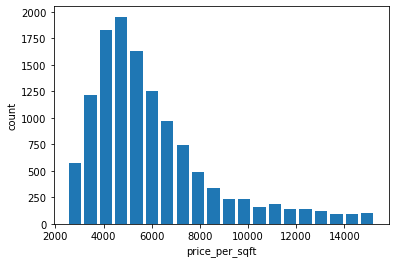

In [54]:
plt.hist(df7.price_per_sqft,bins=20,rwidth=0.8)
plt.ylabel('count')
plt.xlabel('price_per_sqft')
plt.show()

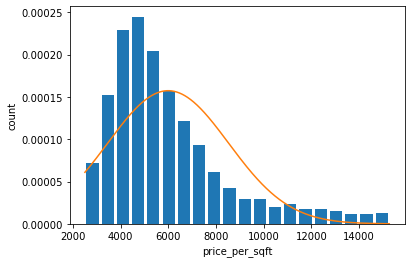

In [52]:
from scipy.stats import norm
import numpy as np

plt.hist(df7.price_per_sqft,bins=20,rwidth=0.8,density=True)


rng=np.arange(df7.price_per_sqft.min(),df7.price_per_sqft.max(),0.1)
plt.plot(rng,norm.pdf(rng,df7.price_per_sqft.mean(),df7.price_per_sqft.std()))
plt.ylabel('count')
plt.xlabel('price_per_sqft')
plt.show()

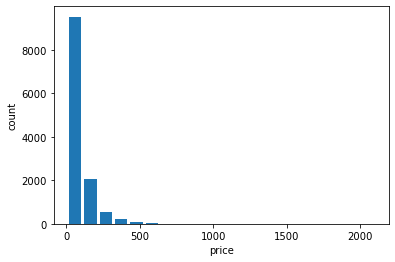

In [34]:
plt.hist(df7.price,bins=20,rwidth=0.8)
plt.ylabel('count')
plt.xlabel('price')
plt.show()

### using std

In [35]:
m=df7.price_per_sqft.mean()
m

5989.9457054871

In [36]:
s=df7.price_per_sqft.std()
s

2533.570857578368

In [37]:
upperlimit=m+3*s
lowerlimit=m-3*s
upperlimit,lowerlimit

(13590.658278222203, -1610.766867248003)

In [41]:
df7[df7.price_per_sqft>upperlimit].size

2560

In [42]:
df8=df7[df7.price_per_sqft<upperlimit]

In [43]:
df8.shape

(12246, 10)

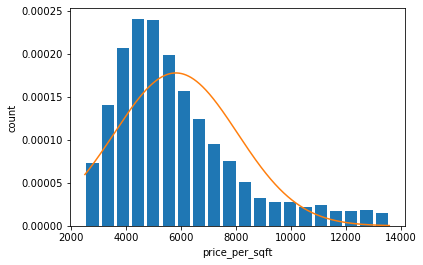

In [56]:
plt.hist(df8.price_per_sqft,bins=20,rwidth=0.8,density=True)
rng=np.arange(df8.price_per_sqft.min(),df8.price_per_sqft.max(),0.1)
plt.plot(rng,norm.pdf(rng,df8.price_per_sqft.mean(),df8.price_per_sqft.std()))
plt.ylabel('count')
plt.xlabel('price_per_sqft')
plt.show()

## using Z- score

Z= (x-mean)/std

In [57]:
df8['z_score']=(df8.price_per_sqft-df8.price_per_sqft.mean())/df8.price_per_sqft.std()

<ipython-input-57-0a70b86e4fca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['z_score']=(df8.price_per_sqft-df8.price_per_sqft.mean())/df8.price_per_sqft.std()


In [58]:
df8.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft,z_score
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2,1,39.07,2,3699.81,-0.942425
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5,3,120.00,4,4615.38,-0.534241
2,Built-up Area,Ready To Move,Uttarahalli,unknown,1440.0,2,3,62.00,3,4305.56,-0.672367
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3,1,95.00,3,6245.89,0.192680
4,Super built-up Area,Ready To Move,Kothanur,unknown,1200.0,2,1,51.00,2,4250.00,-0.697137


In [73]:
df9=df8[df8.z_score<2.5]

In [74]:
df9.shape

(11800, 11)

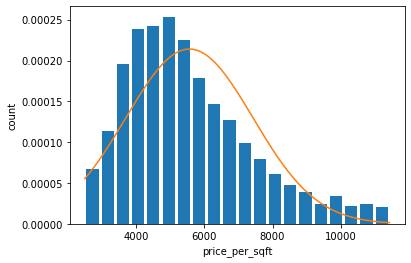

In [75]:
plt.hist(df9.price_per_sqft,bins=20,rwidth=0.8,density=True)
rng=np.arange(df9.price_per_sqft.min(),df9.price_per_sqft.max(),0.1)
plt.plot(rng,norm.pdf(rng,df9.price_per_sqft.mean(),df9.price_per_sqft.std()))
plt.ylabel('count')
plt.xlabel('price_per_sqft')
plt.show()

### Using IQR

|data          | min    |      Q1    |   Q2     |    Q3   |       max  |
|--------------|--------|------------|----------|---------|------------|
|percentile    |0th     |     25th   |  50th    |  75th   |     100th  |

IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR

In [76]:
Q1,Q3=df9.price_per_sqft.quantile([0.25,0.75])
IQR =Q3-Q1
IQR

2396.6675000000005

In [77]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(594.0112499999991, 10180.681250000001)

In [78]:
df10=df9[(df9.price_per_sqft>lower_limit) & (df9.price_per_sqft<upper_limit)]

In [79]:
df9.shape[0]-df10.shape[0]

342

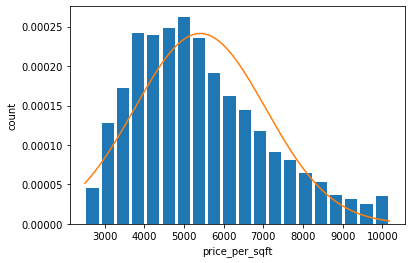

In [80]:
plt.hist(df10.price_per_sqft,bins=20,rwidth=0.8,density=True)
rng=np.arange(df10.price_per_sqft.min(),df10.price_per_sqft.max(),0.1)
plt.plot(rng,norm.pdf(rng,df10.price_per_sqft.mean(),df10.price_per_sqft.std()))
plt.ylabel('count')
plt.xlabel('price_per_sqft')
plt.show()